In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [20]:
columns = [
    "Patient_ID", "Persistency_Flag", "Age", "Race", "Region",
    "Ethnicity", "Gender", "IDN_Indicator", "NTM_Physician_Specialty",
    "NTM_T_Score", "Change_in_T_Score", "NTM_Risk_Segment",
    "Change_in_Risk_Segment", "NTM_Multiple_Risk_Factors"
]

# Generate simulated data
np.random.seed(42)
n_samples = 200  # number of patients

df = pd.DataFrame({
    "Patient_ID": range(1, n_samples+1),
    "Persistency_Flag": np.random.randint(0, 2, n_samples),
    "Age": np.random.randint(30, 80, n_samples),
    "Race": np.random.choice(["White", "Black", "Asian", "Other"], n_samples),
    "Region": np.random.choice(["East", "West", "North", "South"], n_samples),
    "Ethnicity": np.random.choice(["Hispanic", "Non-Hispanic", "Unknown"], n_samples),
    "Gender": np.random.choice(["M", "F"], n_samples),
    "IDN_Indicator": np.random.choice([0,1], n_samples),
    "NTM_Physician_Specialty": np.random.choice(["Orthopedic", "Rheumatologist", "Other"], n_samples),
    "NTM_T_Score": np.random.uniform(-3.0, 3.0, n_samples),
    "Change_in_T_Score": np.random.choice(["Worsened", "Remained Same", "Improved", "Unknown"], n_samples),
    "NTM_Risk_Segment": np.random.choice(["Low", "Medium", "High"], n_samples),
    "Change_in_Risk_Segment": np.random.choice(["Worsened", "Remained Same", "Improved", "Unknown"], n_samples),
    "NTM_Multiple_Risk_Factors": np.random.choice([0,1], n_samples)
})

print("Simulated dataset:")
df.head()

Simulated dataset:


,Patient_ID,Persistency_Flag,Age,Race,Region,Ethnicity,Gender,IDN_Indicator,NTM_Physician_Specialty,NTM_T_Score,Change_in_T_Score,NTM_Risk_Segment,Change_in_Risk_Segment,NTM_Multiple_Risk_Factors
0,1,0,61,Asian,West,Non-Hispanic,F,1,Rheumatologist,-1.241114,Remained Same,High,Improved,0
1,2,1,68,Other,West,Hispanic,F,0,Rheumatologist,2.378015,Worsened,Low,Remained Same,1
2,3,0,78,Asian,South,Non-Hispanic,F,1,Rheumatologist,-2.921988,Worsened,High,Worsened,0
3,4,0,61,Other,East,Unknown,F,1,Rheumatologist,-2.486949,Remained Same,High,Unknown,1
4,5,0,33,White,South,Non-Hispanic,F,0,Orthopedic,-1.752682,Improved,Low,Unknown,1


In [21]:
df.columns = df.columns.str.strip().str.replace('\n','').str.replace('\r','')

# Drop Patient_ID as it's not a feature
df.drop(columns=["Patient_ID"], inplace=True)

In [22]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

In [23]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
X = df.drop("Persistency_Flag", axis=1)
y = df["Persistency_Flag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

LOGISTIC REGRESSION
Accuracy: 0.425
Precision: 0.44
Recall: 0.55
ROC-AUC: 0.38


In [26]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("RANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


RANDOM FOREST
Accuracy: 0.5
Precision: 0.5
Recall: 0.4
ROC-AUC: 0.5025


In [27]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBOOST")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBOOST
Accuracy: 0.4
Precision: 0.4
Recall: 0.4
ROC-AUC: 0.37


In [28]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        20
           1       0.40      0.40      0.40        20

    accuracy                           0.40        40
   macro avg       0.40      0.40      0.40        40
weighted avg       0.40      0.40      0.40        40



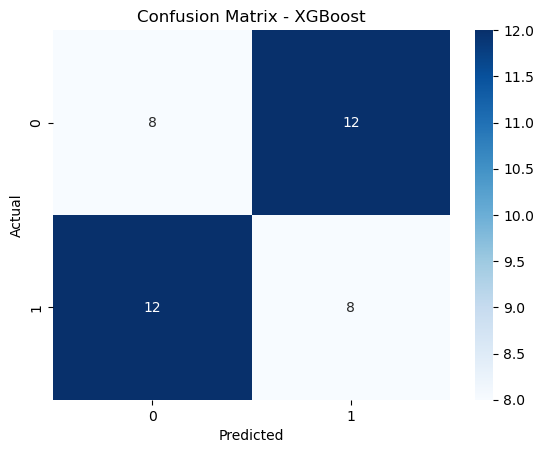

In [29]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

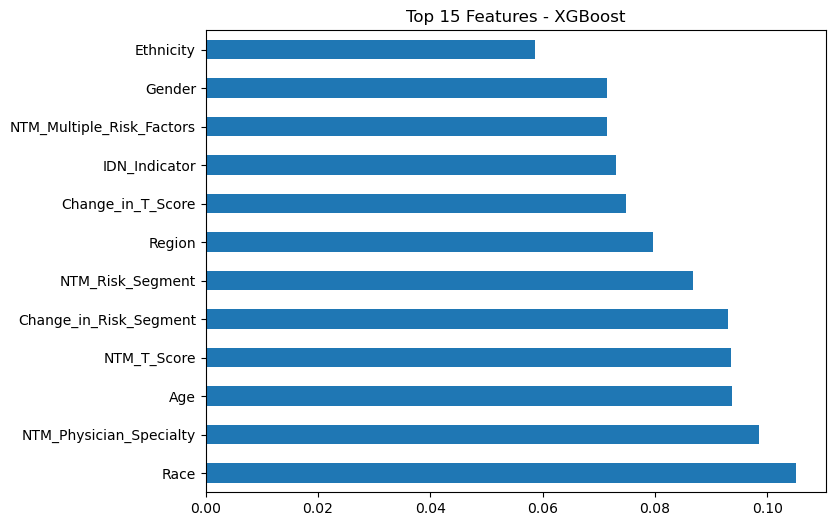

In [30]:
feat_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='barh')
plt.title("Top 15 Features - XGBoost")
plt.show()

In [31]:
joblib.dump(xgb, "persistency_model.pkl")
print("XGBoost model saved successfully!")

XGBoost model saved successfully!
